## 1=Matara 2=Rathnapura 3=Nuwara Eliya 4=Galle

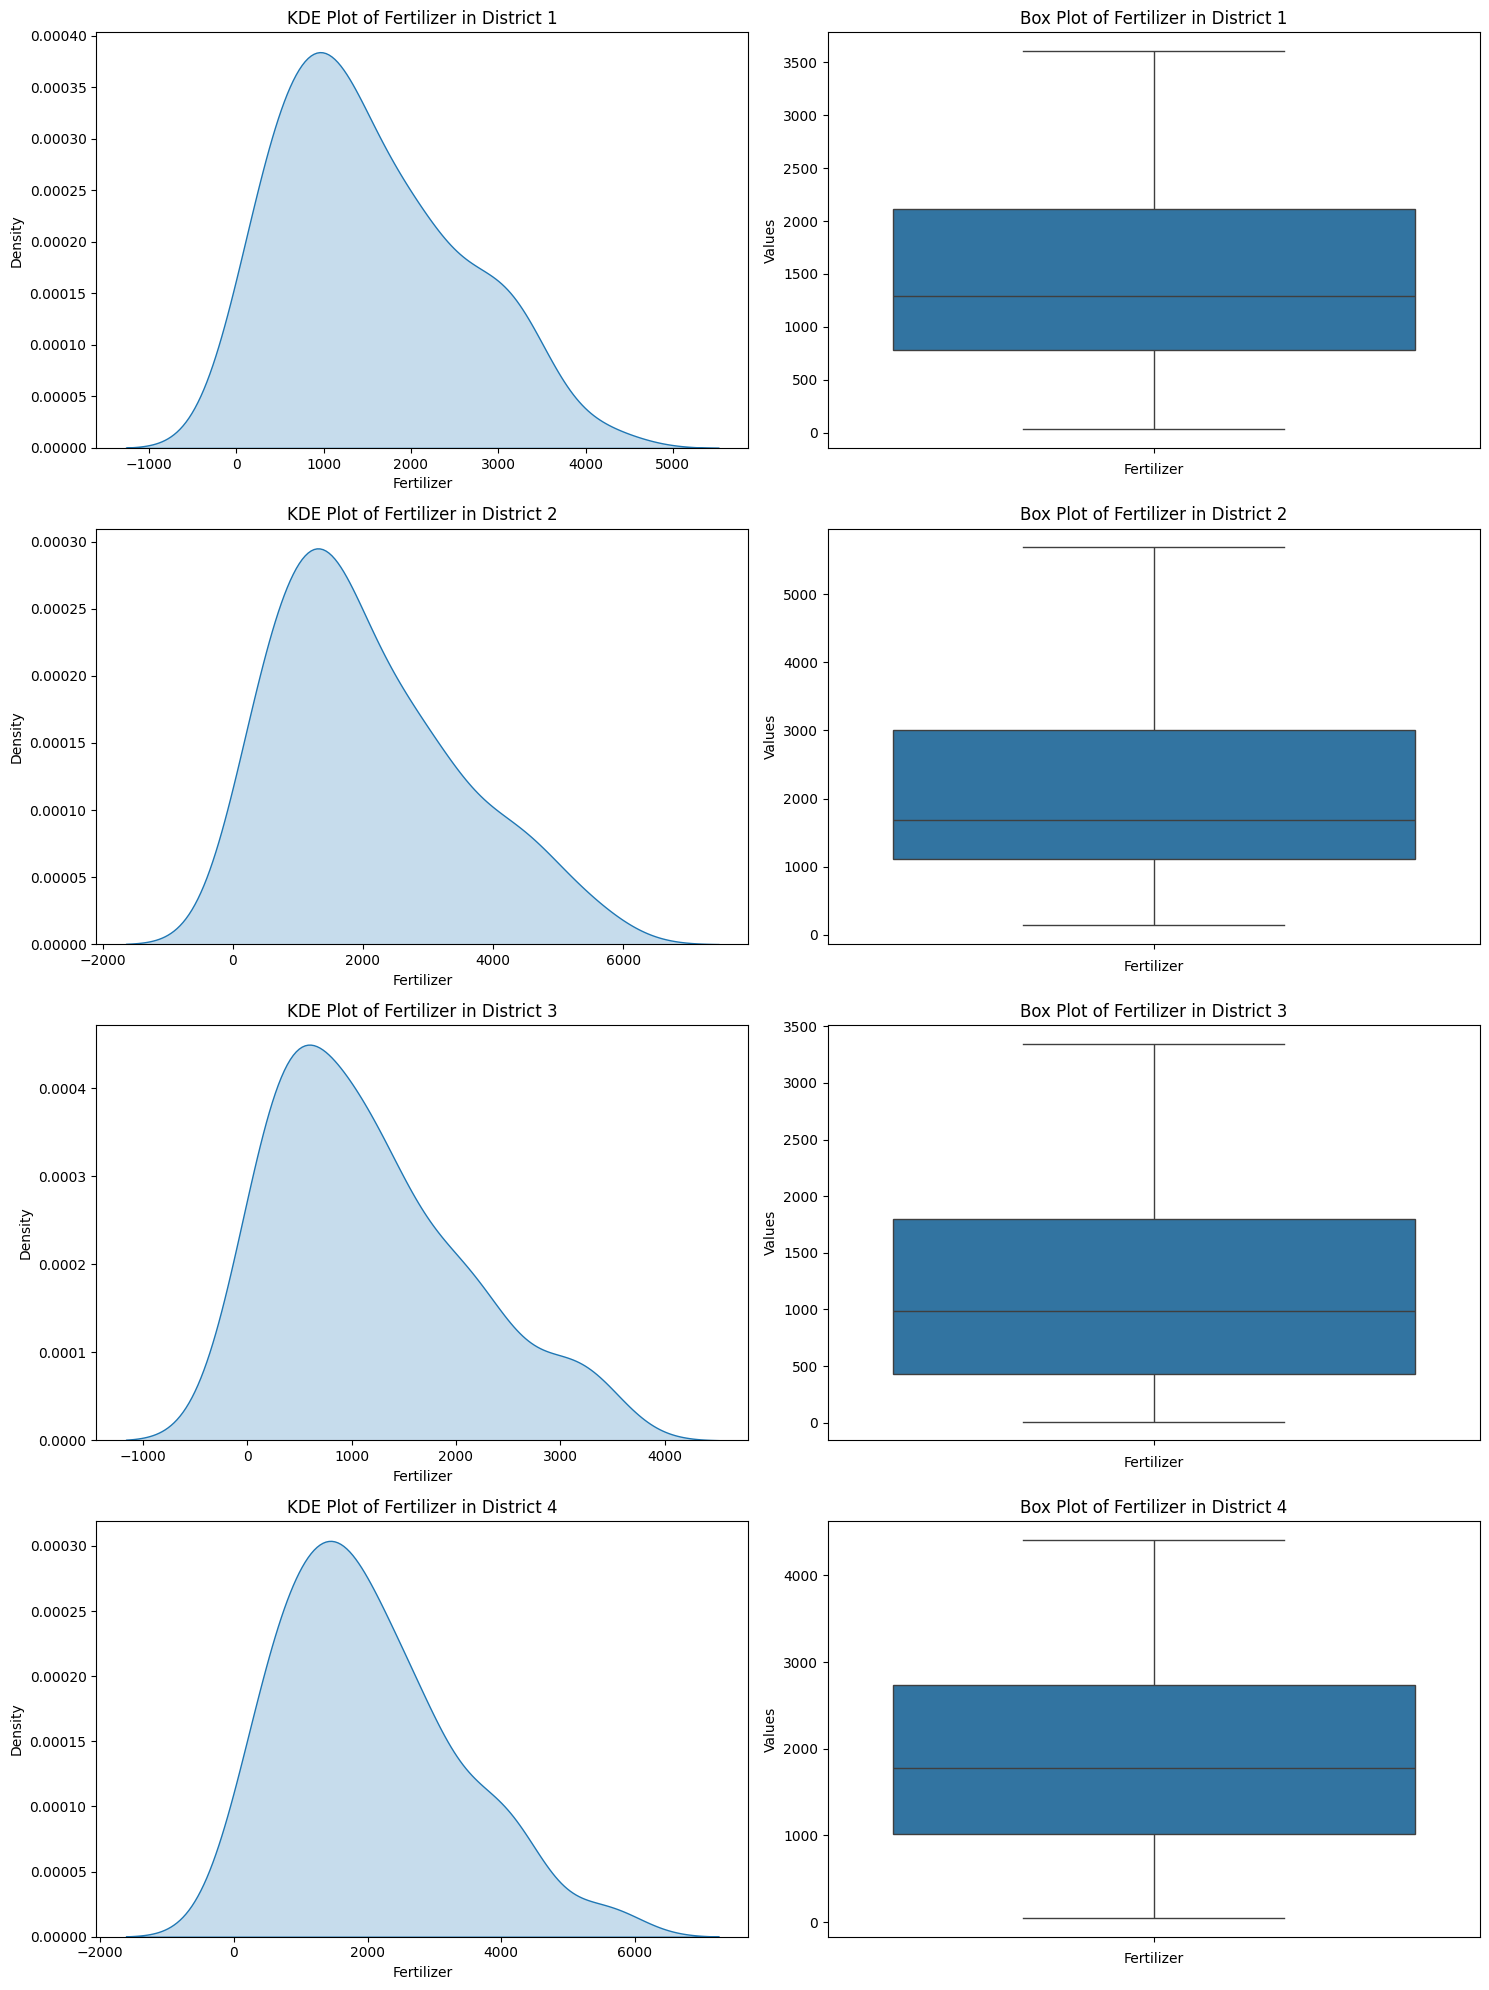

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'AllDistrict_Production.csv'
data = pd.read_csv(file_path)


# Define the column names
fertilizer_column = 'Fertilizer'  # Replace with the correct column name if different
district_column = 'District'  # Replace with the correct column name if different

# Define the list of specific districts to plot
specific_districts = [1, 2, 3, 4]  # Replace with the actual district numbers or names you are interested in


# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Check if the columns exist in the dataset
if fertilizer_column in data.columns and district_column in data.columns:
    # Create a figure with subplots
    num_districts = len(specific_districts)
    fig, axes = plt.subplots(num_districts, 2, figsize=(15, 5 * num_districts))
    
    for i, district in enumerate(specific_districts):
        if district in data[district_column].values:
            # Filter data for the current district
            district_data = data[data[district_column] == district]

             # Remove outliers
            district_data_cleaned = remove_outliers(district_data, fertilizer_column)
            
            # KDE Plot for the 'Fertilizer' column in the current district
            sns.kdeplot(district_data[fertilizer_column], fill=True, ax=axes[i, 0])
            axes[i, 0].set_title(f'KDE Plot of {fertilizer_column} in District {district}')
            axes[i, 0].set_xlabel(fertilizer_column)
            axes[i, 0].set_ylabel('Density')
            
            # Box Plot for the 'Fertilizer' column in the current district
            sns.boxplot(y=district_data_cleaned[fertilizer_column], ax=axes[i, 1])
            axes[i, 1].set_title(f'Box Plot of {fertilizer_column} in District {district}')
            axes[i, 1].set_xlabel(fertilizer_column)
            axes[i, 1].set_ylabel('Values')
        else:
            axes[i, 0].axis('off')
            axes[i, 1].axis('off')
            axes[i, 0].set_title(f"District {district} not found in the dataset")
            axes[i, 1].set_title(f"District {district} not found in the dataset")
    
    plt.tight_layout()
    plt.show()
else:
    print(f"One or both of the columns '{fertilizer_column}' and '{district_column}' are not found in the dataset.")
